**Notebook content:**
- First model: logistic regression 
- 

In [13]:
%reset -f 

In [78]:
from myDefs.defs import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn import metrics
from IPython.display import display

pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 200)
#pd.set_option('display.float_format', lambda x: '%.f' % x)
pd.options.display.precision = 4

#import sys
np.set_printoptions(threshold=sys.maxsize) #- print the full NumPy array

# visualization
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
%matplotlib inline


**Read events file**

In [15]:
path = DATA_PATH + 'matrix1.xlsx'
df = pd.read_excel(path, header=[0,1,2,3], index_col=0)

In [16]:
df.head()

type      metadata                                                        \
time       general                                                         
feature        Sex      Age   Urgency Surgical approach Anastomotic Leak   
statistic constant constant  constant          constant         constant   
pid                                                                        
1123813       male     59.0  elective              Open                1   
1135541     female     43.0  elective              Open                0   
3918745     female     57.0  elective      Laparoscopic                0   
4894647        NaN      NaN  elective              Open                0   
6541482     female     65.0    urgent              Open                0   

type      numeric_events                                                 \
time      before_surgery                                                  
feature          Albumin                     Alkaline Phosphatase         
statistic            max    mean median  min                  max  mean   
pid                                                                       
1123813              4.2  4.2000   4.20  4.2                 97.0  97.0   
1135541              NaN     NaN    NaN  NaN                  NaN   NaN   
3918745              3.9  3.9000   3.90  3.9                 90.0  90.0   
4894647              4.3  4.3000   4.30  4.3                 70.0  70.0   
6541482              3.1  1.9429   1.95  1.4                123.0  94.0   

type                                     ...             drugs  \
time                                     ...          all_days   
feature                Amylase           ... Magnesium sulfate   
statistic median   min     max     mean  ...             count   
pid                                      ...                     
1123813     97.0  97.0    63.0  63.0000  ...               4.0   
1135541      NaN   NaN     NaN      NaN  ...               0.0   
3918745     90.0  90.0    53.0  53.0000  ...               NaN   
4894647     70.0  70.0     NaN      NaN  ...               1.0   
6541482    112.5  33.0    68.0  32.6923  ...               7.0   

type                                                                           \
time                                                                            
feature   Magnesium sulfate  Meroken new Meropenem Metronidazole Morphine hcl   
statistic              count       count     count         count        count   
pid                                                                             
1123813                  0.0         1.0      22.0          52.0          3.0   
1135541                  0.0         0.0       0.0          26.0          0.0   
3918745                  NaN         NaN       NaN           NaN          NaN   
4894647                  1.0         1.0       0.0          73.0          0.0   
6541482                  0.0         0.0       0.0          51.0          2.0   

type                                                                       \
time                                                                        
feature   Morphine hcl  Norepinephrine Norepinephrine + dextrose Optalgin   
statistic         count          count                     count    count   
pid                                                                         
1123813             0.0           30.0                       0.0      2.0   
1135541             3.0            0.0                       0.0      0.0   
3918745             NaN            NaN                       NaN      NaN   
4894647             0.0            0.0                       0.0      3.0   
6541482             0.0           20.0                       0.0      0.0   

type                                                                         
time                                                                         
feature   Piperacillin / tazobactam Prednisone Propranolol Vaben Vancomycin  
statistic  

### Fill missing data

In [17]:
#fill numeric events with median 
df['numeric_events'] = df['numeric_events'].fillna(df['numeric_events'].median())

In [18]:
#fill missing values in dtugs with 0 
df['drugs'] = df['drugs'].fillna(0)

In [19]:
#fill numeric events with median 
df.iloc[:,1] = df.iloc[:,1].fillna(df.iloc[:,1].median())

In [20]:
df.head()

type      metadata                                                        \
time       general                                                         
feature        Sex      Age   Urgency Surgical approach Anastomotic Leak   
statistic constant constant  constant          constant         constant   
pid                                                                        
1123813       male     59.0  elective              Open                1   
1135541     female     43.0  elective              Open                0   
3918745     female     57.0  elective      Laparoscopic                0   
4894647        NaN     55.0  elective              Open                0   
6541482     female     65.0    urgent              Open                0   

type      numeric_events                                                 \
time      before_surgery                                                  
feature          Albumin                     Alkaline Phosphatase         
statistic            max    mean median  min                  max  mean   
pid                                                                       
1123813              4.2  4.2000   4.20  4.2                 97.0  97.0   
1135541              4.1  4.0000   4.00  3.9                 94.0  91.0   
3918745              3.9  3.9000   3.90  3.9                 90.0  90.0   
4894647              4.3  4.3000   4.30  4.3                 70.0  70.0   
6541482              3.1  1.9429   1.95  1.4                123.0  94.0   

type                                     ...             drugs  \
time                                     ...          all_days   
feature                Amylase           ... Magnesium sulfate   
statistic median   min     max     mean  ...             count   
pid                                      ...                     
1123813     97.0  97.0    63.0  63.0000  ...               4.0   
1135541     91.0  84.0    68.0  60.5000  ...               0.0   
3918745     90.0  90.0    53.0  53.0000  ...               0.0   
4894647     70.0  70.0    68.0  60.5000  ...               1.0   
6541482    112.5  33.0    68.0  32.6923  ...               7.0   

type                                                                           \
time                                                                            
feature   Magnesium sulfate  Meroken new Meropenem Metronidazole Morphine hcl   
statistic              count       count     count         count        count   
pid                                                                             
1123813                  0.0         1.0      22.0          52.0          3.0   
1135541                  0.0         0.0       0.0          26.0          0.0   
3918745                  0.0         0.0       0.0           0.0          0.0   
4894647                  1.0         1.0       0.0          73.0          0.0   
6541482                  0.0         0.0       0.0          51.0          2.0   

type                                                                       \
time                                                                        
feature   Morphine hcl  Norepinephrine Norepinephrine + dextrose Optalgin   
statistic         count          count                     count    count   
pid                                                                         
1123813             0.0           30.0                       0.0      2.0   
1135541             3.0            0.0                       0.0      0.0   
3918745             0.0            0.0                       0.0      0.0   
4894647             0.0            0.0                       0.0      3.0   
6541482             0.0           20.0                       0.0      0.0   

type                                                                         
time                                                                         
feature   Piperacillin / tazobactam Prednisone Propranolol Vaben Vancomycin  
statistic  

In [21]:
'''#read events
path = DATA_PATH + "parseData2.csv"
df = pd.read_csv(path, sep=',') 
#parse date of surgery
df['eventStartDate'] = pd.to_datetime(df['eventStartDate'], format='%Y-%m-%d')
df['eventEndDate'] = pd.to_datetime(df['eventEndDate'], format='%Y-%m-%d')

#read annonymous file
path = "{}parseAnonymous0.csv".format(DATA_PATH)
anonymous = pd.read_csv(path, sep=',')
#parse date of surgery
anonymous['Date of surgery'] = pd.to_datetime(anonymous['Date of surgery'], format='%Y-%m-%d')'''

'#read events\npath = DATA_PATH + "parseData2.csv"\ndf = pd.read_csv(path, sep=\',\') \n#parse date of surgery\ndf[\'eventStartDate\'] = pd.to_datetime(df[\'eventStartDate\'], format=\'%Y-%m-%d\')\ndf[\'eventEndDate\'] = pd.to_datetime(df[\'eventEndDate\'], format=\'%Y-%m-%d\')\n\n#read annonymous file\npath = "{}parseAnonymous0.csv".format(DATA_PATH)\nanonymous = pd.read_csv(path, sep=\',\')\n#parse date of surgery\nanonymous[\'Date of surgery\'] = pd.to_datetime(anonymous[\'Date of surgery\'], format=\'%Y-%m-%d\')'

# Logistic Regression 

### Get x and y

In [75]:
to_drop = [df.columns[0], df.columns[2], df.columns[3], df.columns[4]]
x = df.drop(columns=to_drop)
x.head()

type      metadata numeric_events                                           \
time       general before_surgery                                            
feature        Age        Albumin                     Alkaline Phosphatase   
statistic constant            max    mean median  min                  max   
pid                                                                          
1123813       59.0            4.2  4.2000   4.20  4.2                 97.0   
1135541       43.0            4.1  4.0000   4.00  3.9                 94.0   
3918745       57.0            3.9  3.9000   3.90  3.9                 90.0   
4894647       55.0            4.3  4.3000   4.30  4.3                 70.0   
6541482       65.0            3.1  1.9429   1.95  1.4                123.0   

type                                                                         \
time                                                                          
feature                      Amylase                       BASO (%)           
statistic  mean median   min     max     mean median   min      max    mean   
pid                                                                           
1123813    97.0   97.0  97.0    63.0  63.0000   63.0  63.0      0.5  0.5000   
1135541    91.0   91.0  84.0    68.0  60.5000   60.0  56.0      0.5  0.4000   
3918745    90.0   90.0  90.0    53.0  53.0000   53.0  53.0      0.4  0.4000   
4894647    70.0   70.0  70.0    68.0  60.5000   60.0  56.0      0.3  0.3000   
6541482    94.0  112.5  33.0    68.0  32.6923   29.0   9.0      0.3  0.1214   

type       ...             drugs                                           \
time       ...          all_days                                            
feature    ... Magnesium sulfate Magnesium sulfate  Meroken new Meropenem   
statistic  ...             count              count       count     count   
pid        ...                                                              
1123813    ...               4.0                0.0         1.0      22.0   
1135541    ...               0.0                0.0         0.0       0.0   
3918745    ...               0.0                0.0         0.0       0.0   
4894647    ...               1.0                1.0         1.0       0.0   
6541482    ...               7.0                0.0         0.0       0.0   

type                                                               \
time                                                                
feature   Metronidazole Morphine hcl Morphine hcl  Norepinephrine   
statistic         count        count         count          count   
pid                                                                 
1123813            52.0          3.0           0.0           30.0   
1135541            26.0          0.0           3.0            0.0   
3918745             0.0          0.0           0.0            0.0   
4894647            73.0          0.0           0.0            0.0   
6541482            51.0          2.0           0.0           20.0   

type                                                                    \
time                                                                     
feature   Norepinephrine + dextrose Optalgin Piperacillin / tazobactam   
statistic                     count    count                     count   
pid                                                                      
1123813                         0.0      2.0                      11.0   
1135541                         0.0      0.0                       0.0   
3918745                         0.0      0.0                       0.0   
4894647                         0.0      3.0                      18.0   
6541482                         0.0      0.0                      62.0   

type                                               
time                                               
feature   Prednisone Propranolol Vaben Vancomycin  
statistic      count       count count      count  
pid              

In [23]:
y = df.iloc[:, 4]

### Exploration

In [24]:
y.value_counts()

0    482
1     43
Name: (metadata, general, Anastomotic Leak, constant), dtype: int64

[Text(0, 0.5, 'count'), Text(0.5, 0, 'Anastomotic Leak')]

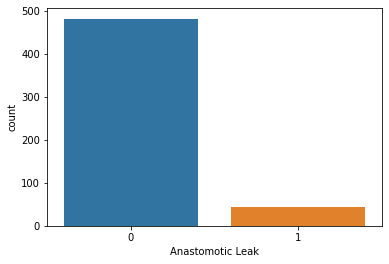

In [25]:
sns.countplot(x=y).set(xlabel='Anastomotic Leak', ylabel='count')

In [26]:
percent = y.sum()/len(y) 
print("percentage of num Anastomotic leak: {:.2f}%".format(percent*100))

percentage of num Anastomotic leak: 8.19%


### train - test

In [74]:
#The stratify parameter makes a split so that the proportion of values in the sample produced 
#will be the same as the proportion of values provided to parameter stratify.

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=y)

traintest = pd.concat([y_train.value_counts(), y_test.value_counts()], axis=1)
traintest.columns = ['x_train', 'x_test']
traintest['total'] = traintest['x_train'] + traintest['x_test']
traintest

,x_train,x_test,total
0,386,96,482
1,34,9,43


In [29]:
model = LogisticRegression(solver='lbfgs', max_iter=100000)
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Performances

In [108]:
y_pred = model.predict(x_test)
score = model.score(x_test, y_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(score))

Accuracy of logistic regression classifier on test set: 0.88


In [106]:
#precision is the ratio tp / (tp + fp)
"accuracy: {:.2f}".format((88+4)/(105))

'accuracy: 0.88'

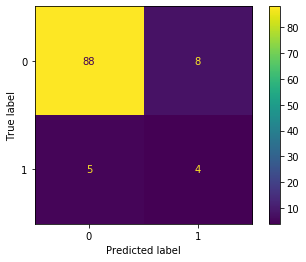

In [77]:
#plot confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix
plot_confusion_matrix(model, x_test, y_test)

In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93        96
           1       0.33      0.44      0.38         9

    accuracy                           0.88       105
   macro avg       0.64      0.68      0.66       105
weighted avg       0.89      0.88      0.88       105



In [109]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

In [96]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_roc_curve(y_test, y_pred)
plt.show()

IndexError: too many indices for array

In [95]:

y_test.values


array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [87]:
4/9

0.4444444444444444